<a href="https://colab.research.google.com/github/mohitsaini1166/Diebetes-Prediction-ML-Project/blob/main/Diebetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Diebetes Prediction Project***

In [64]:
from google.colab import files
uploaded =  files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset (1).csv


In [66]:
#import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [85]:
#upload data set
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [86]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [87]:
#Check Missing Values
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [88]:
#Check Duplicate values
df.duplicated().sum()

3854

In [89]:
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


#***VISUALIZATION***

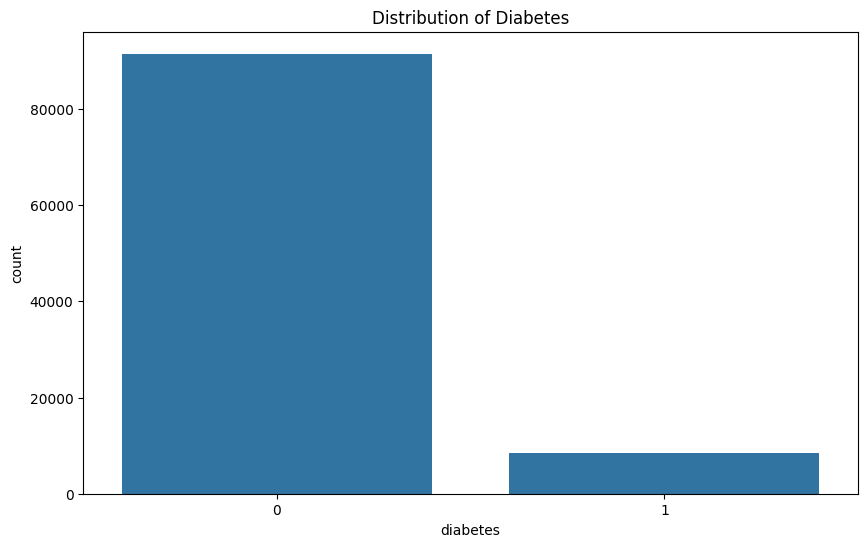

In [90]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of Diabetes')
plt.show()


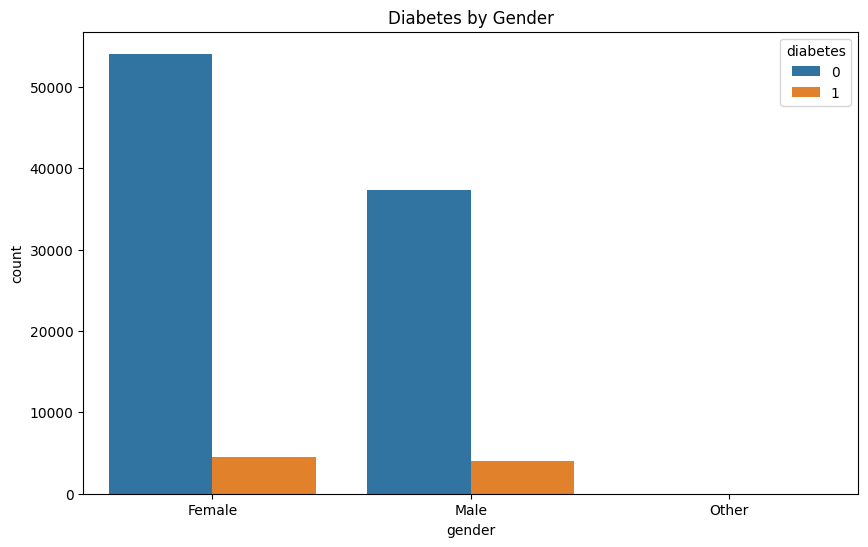

In [91]:
# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Diabetes by Gender')
plt.show()

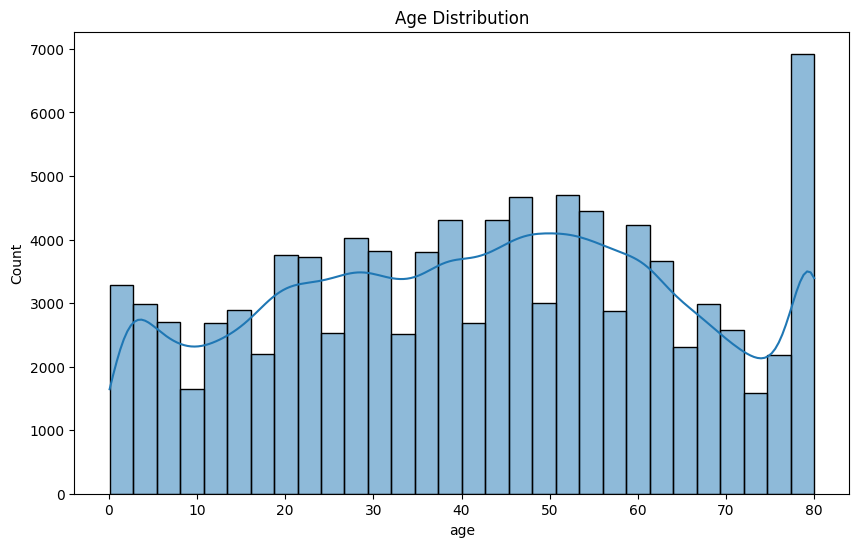

In [92]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [93]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


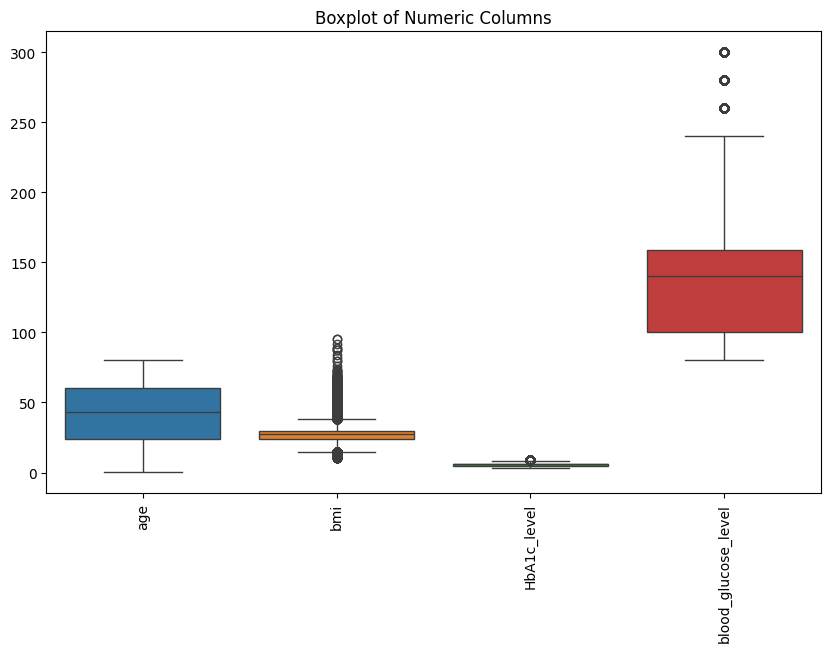

In [94]:
# Simple Boxplot to identify outliers
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

plt.figure(figsize=(10, 6))
sns.boxplot(df[numeric_columns])
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=90)
plt.show()


In [95]:
# Removing outliers using IQR method
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [96]:
# Converting categorical columns to numerical
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

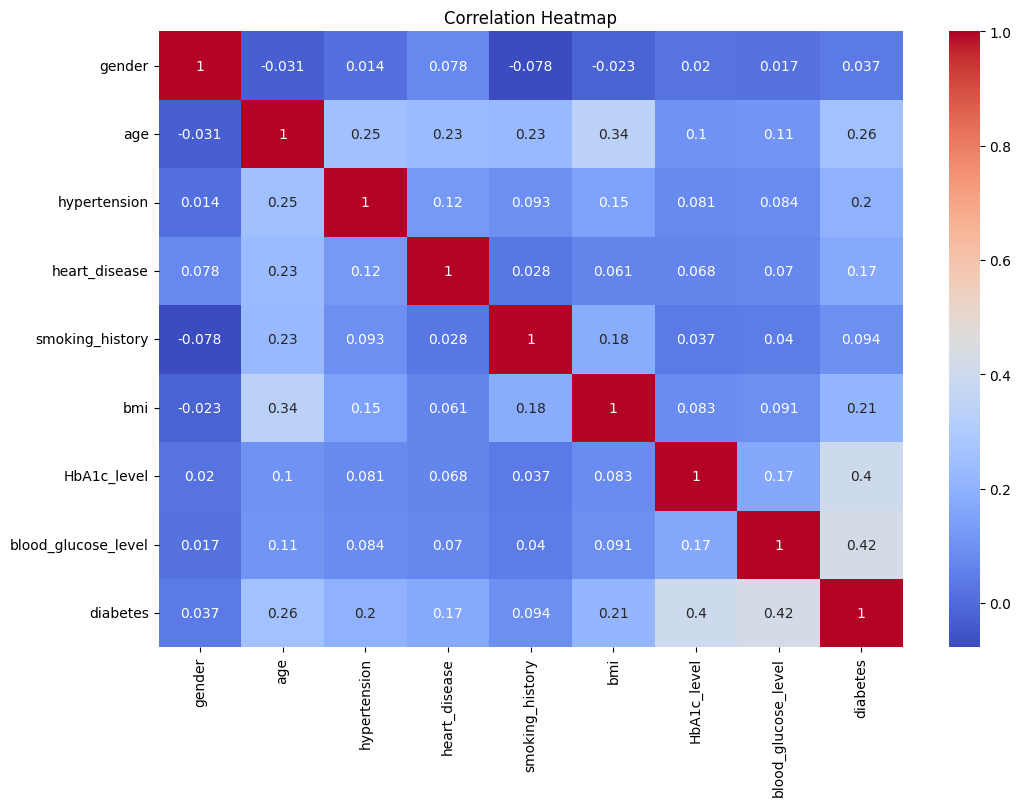

In [97]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [98]:
# Dropping low-correlation columns
df.drop(['gender', 'smoking_history', 'heart_disease'], axis=1, inplace=True)

In [99]:
# Splitting the data into features and target
x = df.drop('diabetes', axis=1)
y = df['diabetes']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [100]:
# Standardize numerical features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [101]:

y_train.value_counts()

,count
diabetes,
0,73208
1,6792


In [102]:
# Handle Imbalanced Data (if needed)
if y_train.value_counts().min() / y_train.value_counts().max() < 0.5:  # Check imbalance
    smote = SMOTE(random_state=42)
    x_train, y_train = smote.fit_resample(x_train, y_train)

In [103]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42)
}


In [104]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }


In [105]:
# Print results
for model, metrics in results.items():
    print(f"{model} Performance:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()

Logistic Regression Performance:
  Accuracy: 0.8848
  Precision: 0.9384
  Recall: 0.8848
  F1 Score: 0.9021

Decision Tree Performance:
  Accuracy: 0.9517
  Precision: 0.9534
  Recall: 0.9517
  F1 Score: 0.9525

Random Forest Performance:
  Accuracy: 0.9587
  Precision: 0.9579
  Recall: 0.9587
  F1 Score: 0.9582

